In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Klinkenberg Effect
-when we measure the permeability of rock using gas as flowing fluid, generally it will provide larger permeability than when we measure using liquid as flowing fluid

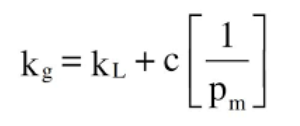

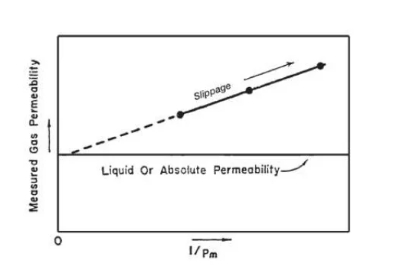

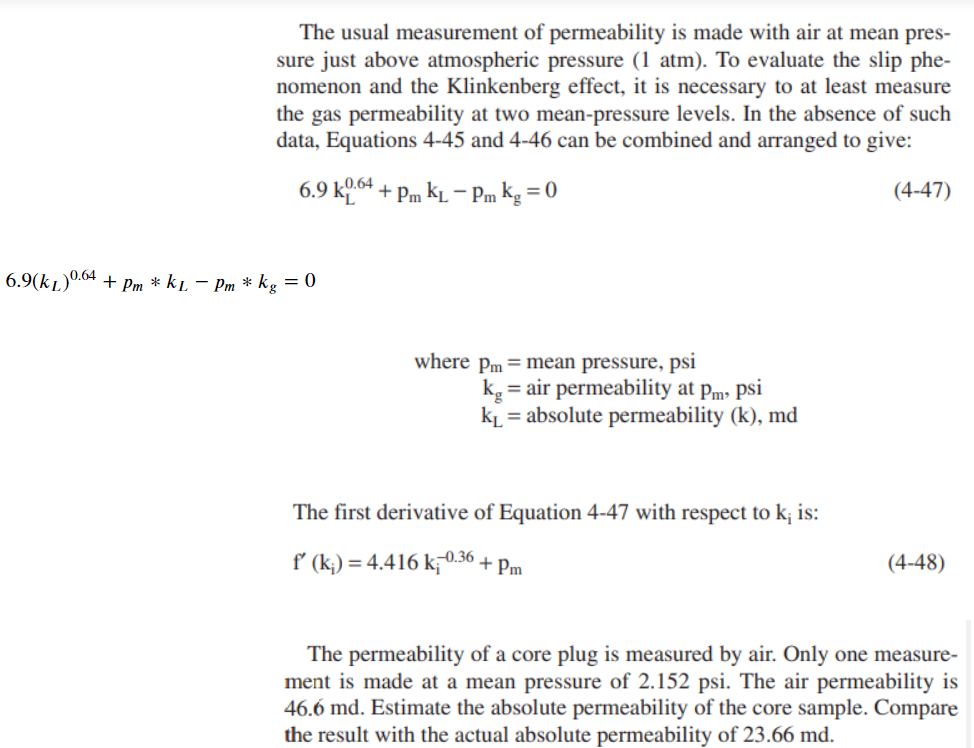

In [37]:
k = float(input('Enter the initial guess of absolute permeability (mD): '))
pmean = float(input('Enter the mean pressure (psi): '))
kgas = float(input('Enter the gas permeability (mD): '))

Enter the initial guess of absolute permeability (mD): 200
Enter the mean pressure (psi): 3
Enter the gas permeability (mD): 47


In [38]:
while abs(6.9*k**0.64 + pmean*k - pmean*kgas) > 0.0001:
    k = k - (6.9*(k**0.64) + pmean*k - pmean*kgas)/(4.416*k**(-0.36) + pmean)
print(f'\nThe absolute permeability of this core sample according to the NEWTHON-RAPHSON METHOD is {k} mD')


The absolute permeability of this core sample according to the NEWTHON-RAPHSON METHOD is 27.719739772927824 mD


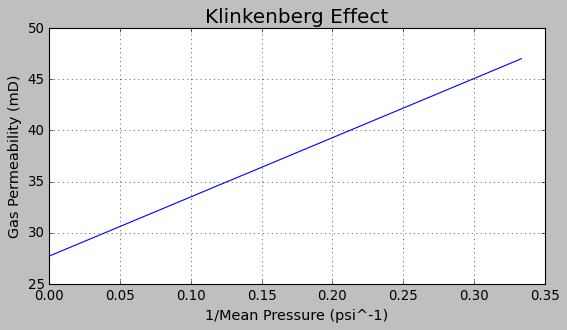

In [39]:
x = [0,1/pmean]
y = [k,kgas]

plt.figure(figsize=(8,4))
plt.style.use('classic')
plt.plot(x,y)
plt.xlabel('1/Mean Pressure (psi^-1)', size=13)
plt.ylabel('Gas Permeability (mD)', size=13)
plt.title('Klinkenberg Effect', size=18)
plt.grid()

In [19]:
# plt.style.available

In [40]:
x,y

([0, 0.3333333333333333], [27.719739772927824, 47.0])

In [41]:
#how to make extrapolation: lets say u want to know kgas if the value of 1/mean_pressure is range 0 to 0.5

#find the slope and intercept
slope_and_intercept =  np.polyfit(x,y,1) #1 (1st degree): because its a straight line, not parabolic or something else
slope_and_intercept

array([57.84078068, 27.71973977])

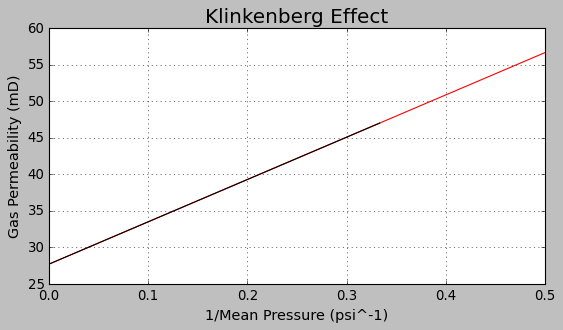

In [42]:
#we can use this slope to calcute any particular value or point of 1/mean_pressure (extrapolation)

#for example, we want to plot until 1/mean_pressure equal 0.5
x_axis = np.linspace(0,0.5,200) #1/mean_pressure from 0 to 0.5 and have 200 points/steps
polynomial = np.poly1d(slope_and_intercept)

y_axis = polynomial(x_axis)

plt.figure(figsize=(8,4))
plt.style.use('classic')
plt.plot(x_axis,y_axis, color='red')
plt.plot(x,y, color='black')
plt.xlabel('1/Mean Pressure (psi^-1)', size=13)
plt.ylabel('Gas Permeability (mD)', size=13)
plt.title('Klinkenberg Effect', size=18)
plt.grid()

In [53]:
x_axis

array([0.        , 0.00251256, 0.00502513, 0.00753769, 0.01005025,
       0.01256281, 0.01507538, 0.01758794, 0.0201005 , 0.02261307,
       0.02512563, 0.02763819, 0.03015075, 0.03266332, 0.03517588,
       0.03768844, 0.04020101, 0.04271357, 0.04522613, 0.04773869,
       0.05025126, 0.05276382, 0.05527638, 0.05778894, 0.06030151,
       0.06281407, 0.06532663, 0.0678392 , 0.07035176, 0.07286432,
       0.07537688, 0.07788945, 0.08040201, 0.08291457, 0.08542714,
       0.0879397 , 0.09045226, 0.09296482, 0.09547739, 0.09798995,
       0.10050251, 0.10301508, 0.10552764, 0.1080402 , 0.11055276,
       0.11306533, 0.11557789, 0.11809045, 0.12060302, 0.12311558,
       0.12562814, 0.1281407 , 0.13065327, 0.13316583, 0.13567839,
       0.13819095, 0.14070352, 0.14321608, 0.14572864, 0.14824121,
       0.15075377, 0.15326633, 0.15577889, 0.15829146, 0.16080402,
       0.16331658, 0.16582915, 0.16834171, 0.17085427, 0.17336683,
       0.1758794 , 0.17839196, 0.18090452, 0.18341709, 0.18592

In [34]:
# y_axis c

In [43]:
#Mybrainstorming
#create DataFrame of mean_pressure and kgas

klinkenberg = {'1/Mean_Pressure':x_axis, 'Gas_Permeability':y_axis}
df_klinkenberg = pd.DataFrame(data=klinkenberg, index=x_axis)
df_klinkenberg

,1/Mean_Pressure,Gas_Permeability
0.000000,0.000000,27.719740
0.002513,0.002513,27.865068
0.005025,0.005025,28.010397
0.007538,0.007538,28.155726
0.010050,0.010050,28.301054
...,...,...
0.489950,0.489950,56.058816
0.492462,0.492462,56.204144
0.494975,0.494975,56.349473
0.497487,0.497487,56.494802


In [44]:
#accessing when mean_pressure is 0.40201005: #from the np.array 1/mean_pressure
df_klinkenberg.loc[0.40201005:0.40201008, :] #if we write same 1/mean_pressure it won't provide anything, so we have to write the stopping point with a little bit higher than the starting point
                                            #thats why, the starting point is 0.40201005 and the stopping point is 0.40201008 which have different between '5' and '8' (at the latest both number)

,1/Mean_Pressure,Gas_Permeability
0.40201,0.40201,50.972315


In [48]:
#accessing when mean_pressure is 0.4 - 0.5:
df_klinkenberg.loc[0.4:0.5, :] #this code is more easy to understand than the above code, if we want to return particular value of 1/mean_pressure

,1/Mean_Pressure,Gas_Permeability
0.402010,0.402010,50.972315
0.404523,0.404523,51.117644
0.407035,0.407035,51.262972
0.409548,0.409548,51.408301
0.412060,0.412060,51.553629
0.414573,0.414573,51.698958
0.417085,0.417085,51.844286
0.419598,0.419598,51.989615
0.422111,0.422111,52.134944
0.424623,0.424623,52.280272


In [46]:
#accessing when mean_pressure is 0.3 - 0.4:
df_klinkenberg.loc[0.3:0.4, :]

,1/Mean_Pressure,Gas_Permeability
0.301508,0.301508,45.159171
0.304020,0.304020,45.304500
0.306533,0.306533,45.449828
0.309045,0.309045,45.595157
0.311558,0.311558,45.740486
0.314070,0.314070,45.885814
0.316583,0.316583,46.031143
0.319095,0.319095,46.176471
0.321608,0.321608,46.321800
0.324121,0.324121,46.467128


Enter the initial guess of absolute permeability (mD): 200
Enter the mean pressure (psi): 3
Enter the gas permeability (mD): 47

The absolute permeability of this core sample according to the NEWTHON-RAPHSON METHOD is 27.719739772927824 mD


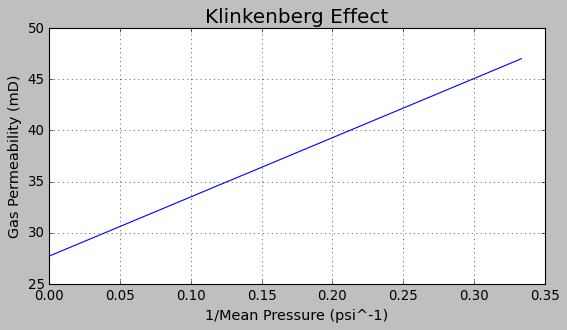

In [22]:
#create function klinkenberg

def klinkenberg():
    k = float(input('Enter the initial guess of absolute permeability (mD): '))
    pmean = float(input('Enter the mean pressure (psi): '))
    kgas = float(input('Enter the gas permeability (mD): '))
    
    while abs(6.9*k**0.64 + pmean*k - pmean*kgas) > 0.0001:
        k = k - (6.9*(k**0.64) + pmean*k - pmean*kgas)/(4.416*k**(-0.36) + pmean)
    print(f'\nThe absolute permeability of this core sample according to the NEWTHON-RAPHSON METHOD is {k} mD')
    
    x = [0,1/pmean]
    y = [k,kgas]

    plt.figure(figsize=(8,4))
    plt.style.use('classic')
    plt.plot(x,y)
    plt.xlabel('1/Mean Pressure (psi^-1)', size=13)
    plt.ylabel('Gas Permeability (mD)', size=13)
    plt.title('Klinkenberg Effect', size=18)
    plt.grid()
    
klinkenberg()

Enter the liquid permeability (mD): 27.72
Enter the mean pressure (psi): 3
Enter the initial guess of absolute permeability (mD): 0

When the mean pressure is 3.0 psi, then the gas permeability is 47.00037606621012 mD


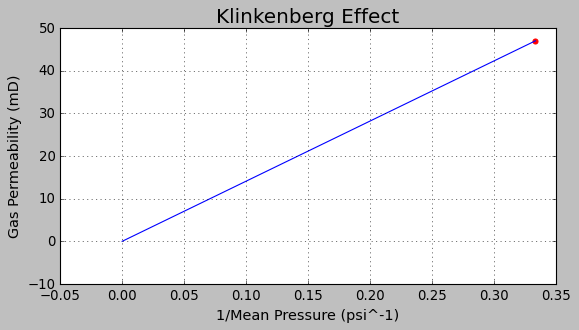

In [23]:
#Add functionality for calculating gas permeability at given mean pressure and plot that scatter in figure
def gas_permeability():
    kl = float(input('Enter the liquid permeability (mD): '))
    pm = float(input('Enter the mean pressure (psi): '))
    k = float(input('Enter the initial guess of absolute permeability (mD): '))
    
    kg = kl + ((6.9*kl**0.64)*1/pm)
    
    print(f'\nWhen the mean pressure is {pm} psi, then the gas permeability is {kg} mD')
    
    x = [0,1/pm]
    y = [k,kg]

    plt.figure(figsize=(8,4))
    plt.style.use('classic')
    plt.plot(x,y)
    plt.xlabel('1/Mean Pressure (psi^-1)', size=13)
    plt.ylabel('Gas Permeability (mD)', size=13)
    plt.title('Klinkenberg Effect', size=18)
    plt.grid()
    
    plt.scatter(x=1/pm, y=kg, color='red')
    
gas_permeability()

## Pressure Profiling

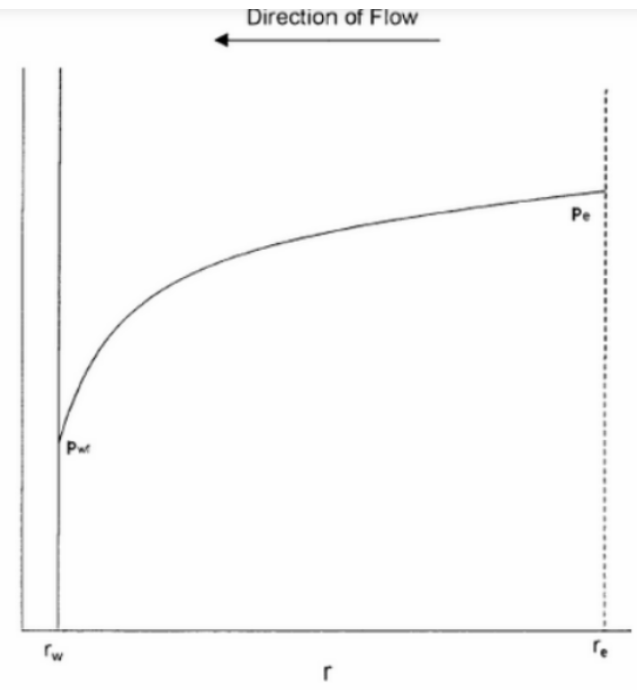

In [6]:
re = float(input('re --> Outer radius of reservoir (ft): '))
rw = float(input('rw --> wellbore radius (ft): '))
Pwf = float(input('Pwf --> bottomhole pressure (psi): '))
h = float(input('h --> net pay thickness (ft): '))
k = float(input('k --> average reservoir permeability (mD): '))
q = float(input('q --> flowrate (STB/day): '))
mu = float(input('mu --> oil viscosity (cp): '))
B = 1

re --> Outer radius of reservoir (ft): 1800
rw --> wellbore radius (ft): 0.5
Pwf --> bottomhole pressure (psi): 1500
h --> net pay thickness (ft): 60
k --> average reservoir permeability (mD): 150
q --> flowrate (STB/day): 200
mu --> oil viscosity (cp): 15


In [8]:
#generating x-axis
r = np.linspace(rw,re,500)
r

array([5.00000000e-01, 4.10621242e+00, 7.71242485e+00, 1.13186373e+01,
       1.49248497e+01, 1.85310621e+01, 2.21372745e+01, 2.57434870e+01,
       2.93496994e+01, 3.29559118e+01, 3.65621242e+01, 4.01683367e+01,
       4.37745491e+01, 4.73807615e+01, 5.09869739e+01, 5.45931864e+01,
       5.81993988e+01, 6.18056112e+01, 6.54118236e+01, 6.90180361e+01,
       7.26242485e+01, 7.62304609e+01, 7.98366733e+01, 8.34428858e+01,
       8.70490982e+01, 9.06553106e+01, 9.42615230e+01, 9.78677355e+01,
       1.01473948e+02, 1.05080160e+02, 1.08686373e+02, 1.12292585e+02,
       1.15898798e+02, 1.19505010e+02, 1.23111222e+02, 1.26717435e+02,
       1.30323647e+02, 1.33929860e+02, 1.37536072e+02, 1.41142285e+02,
       1.44748497e+02, 1.48354709e+02, 1.51960922e+02, 1.55567134e+02,
       1.59173347e+02, 1.62779559e+02, 1.66385772e+02, 1.69991984e+02,
       1.73598196e+02, 1.77204409e+02, 1.80810621e+02, 1.84416834e+02,
       1.88023046e+02, 1.91629259e+02, 1.95235471e+02, 1.98841683e+02,
      

In [9]:
#y-axis

#steady-state condition
Pressure = []
for i in range(len(r)):
    P = Pwf + (141.2*q*mu*B*(np.log(r[i]/rw))/k/h)
    Pressure.append(P)

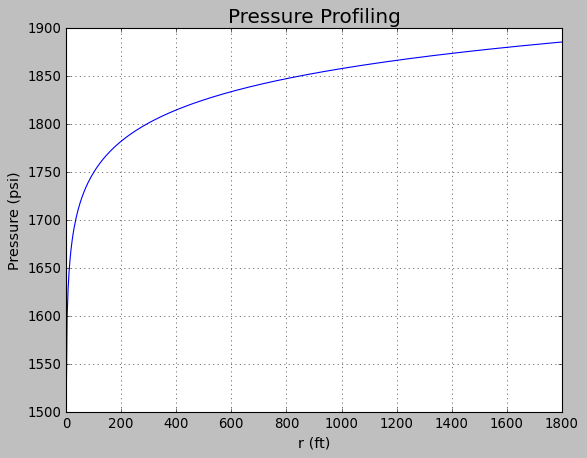

In [15]:
plt.figure(figsize=(8,6))
plt.plot(r,Pressure)
plt.style.use('classic')
plt.xlabel('r (ft)', size=13)
plt.ylabel('Pressure (psi)', size=13)
plt.title('Pressure Profiling', size=18)
plt.grid()        

In [16]:
def pressure_profiling():
    #user input
    re = float(input('re --> Outer radius of reservoir (ft): '))
    rw = float(input('rw --> wellbore radius (ft): '))
    Pwf = float(input('Pwf --> bottomhole pressure (psi): '))
    h = float(input('h --> net pay thickness (ft): '))
    k = float(input('k --> average reservoir permeability (mD): '))
    q = float(input('q --> flowrate (STB/day): '))
    mu = float(input('mu --> oil viscosity (cp): '))
    B = 1
    
    #generating x-axis
    r = np.linspace(rw,re,500)
    
    #y-axis
    #steady-state condition
    Pressure = []
    for i in range(len(r)):
        P = Pwf + (141.2*q*mu*B*(np.log(r[i]/rw))/k/h)
        Pressure.append(P)
    
    #plotting
    plt.figure(figsize=(8,6))
    plt.plot(r,Pressure)
    plt.style.use('classic')
    plt.xlabel('r (ft)', size=13)
    plt.ylabel('Pressure (psi)', size=13)
    plt.title('Pressure Profiling', size=18)
    plt.grid()

## Dynamic Plotting: Pressure Profile

1. Visualizing the effect of viscosity, flowrate, and permeability

In [5]:
from ipywidgets import interactive

In [18]:
def flowprofile(mu,q,k): #check the effect viscosity,flowrate, and permeability (input)
    re = 3000
    rw = 0.5
    r = np.linspace(rw,re,500)
    pe = 4000
    B = 1
    h = 30
    
    #pressure
    #substraction: because we input 'pe', instead of 'pwf' like the previous function (pressure_profiling)
    P = pe - (141.2*q*mu*B*(np.log(re/r))/k/h)
    
    #y-minimum when pressure at 'r' equal to 'rw'
    y_min = P[np.where(r==rw)]
    
    #plot horizontal line at y-minimum
    plt.axhline(y_min, linewidth=4, color='red')
    
    #value of 'y' is between 0 to 5000
    plt.ylim(0,5000) 
    
    plt.plot(r,P, linewidth=4)
    plt.xlabel('r (ft)')
    plt.ylabel('Pressure (psi)')
    plt.title('Reservoir Pressure Profile')
    plt.grid()
    
    return r,P #output

In [19]:
#check the effect of mu,q,k
w = interactive(flowprofile, mu = (10,220), q = (100,200), k = (200,1000)) #provide starting and stopping point
w

interactive(children=(IntSlider(value=115, description='mu', max=220, min=10), IntSlider(value=150, descriptio…

## IPRs

In [49]:
#Vogel IPR for saturated reservoirs
#p_reservoir = p_bubble

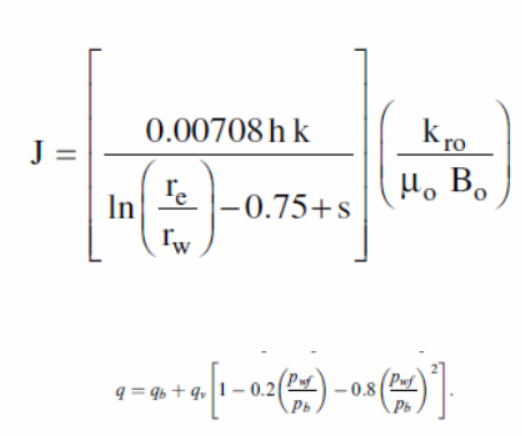

In [51]:
porosity = float(input("Enter Porosity: "))
K = float(input("Enter Perm.(md): "))
h = float(input("Enter pay zone thicknes(Feet): "))
P = float(input("Enter  Reservoir Pressure(psi): "))
Pb = float(input("Enter Bubble Point Pressure(psi): "))
Bo = float(input("Enter Formation Volume Factor: "))
Viscosity  = float(input("Enter fluid viscosity(cp): "))
ct = float(input("Enter Total Compressibility(psi-1): "))
A = float(input("Enter Drainage Area(Acres): "))
re = np.sqrt(43560*A/3.14)
rw = float(input("Enter Wellbore radius(ft): "))
S = float(input("Enter Skin Factor: "))

Enter Porosity: 0.19
Enter Perm.(md): 8.2
Enter pay zone thicknes(Feet): 53
Enter  Reservoir Pressure(psi): 5651
Enter Bubble Point Pressure(psi): 5651
Enter Formation Volume Factor: 1.1
Enter fluid viscosity(cp): 1.7
Enter Total Compressibility(psi-1): 0.0000129
Enter Drainage Area(Acres): 640
Enter Wellbore radius(ft): 0.328
Enter Skin Factor: 0


In [54]:
#calculate PI
PI = K*h/(141.2*Bo*Viscosity*(np.log(re/rw)-0.75+S))
print(f'The value of productivity index is {PI} STB/psi/day')

The value of productivity index is 0.19678102247296522 STB/psi/day


In [55]:
#calculate qmax (Absolute Open Flow)
qmax = PI*P/1.8
print(f'The value of qmax is {qmax} STB/day')

The value of qmax is 617.783087774848 STB/day


In [62]:
#generating pwf_assumption

a = np.arange(0,P,500) #only untill 5500 psi

#including the reservoir pressure, 5651 psi
pwf_assumption = np.append(a,P)

#reverse to make easier
pwf_assumption = pwf_assumption[-1::-1]
pwf_assumption

array([5651., 5500., 5000., 4500., 4000., 3500., 3000., 2500., 2000.,
       1500., 1000.,  500.,    0.])

In [112]:
#calculate each flowrate at pwf_assumption
flowrate = []
for i in pwf_assumption:
    q = qmax*(1-0.2*(i/P)-0.8*((i/P)**2))
    flowrate.append(q)

flowrate

[282.69935293443274,
 351.6688591396637,
 412.9000683877007,
 466.3929806785436,
 512.1475960121925,
 550.1639143886474,
 580.4419358079083,
 602.9816602699751,
 617.783087774848]

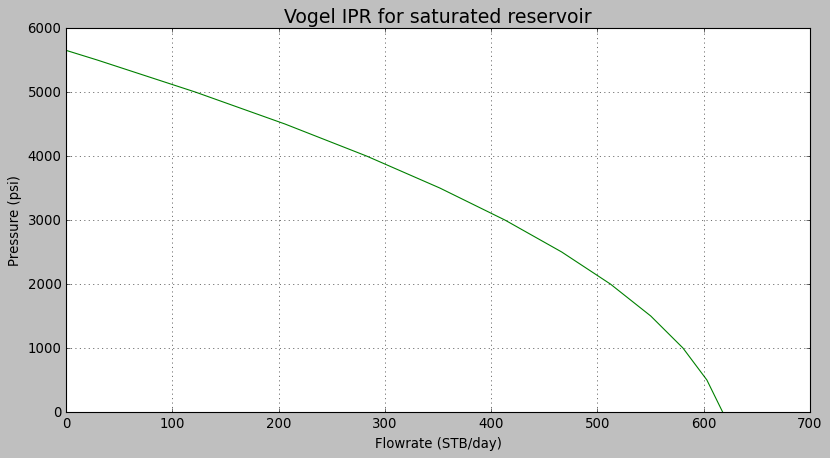

In [76]:
plt.figure(figsize=(12,6))
plt.plot(flowrate,pwf_assumption, color='green')
plt.xlabel('Flowrate (STB/day)')
plt.ylabel('Pressure (psi)')
plt.title('Vogel IPR for saturated reservoir', size=17)
plt.grid()

In [7]:
#create a function:

def vogel_saturated():
    porosity = float(input("Enter Porosity: "))
    K = float(input("Enter Perm.(md): "))
    h = float(input("Enter pay zone thicknes(Feet): "))
    P = float(input("Enter  Reservoir Pressure(psi): "))
    Pb = float(input("Enter Bubble Point Pressure(psi): "))
    Bo = float(input("Enter Formation Volume Factor: "))
    Viscosity  = float(input("Enter fluid viscosity(cp): "))
    ct = float(input("Enter Total Compressibility(psi-1): "))
    A = float(input("Enter Drainage Area(Acres): "))
    re = np.sqrt(43560*A/3.14)
    rw = float(input("Enter Wellbore radius(ft): "))
    S = float(input("Enter Skin Factor: "))
    
    #calculate PI
    PI = K*h/(141.2*Bo*Viscosity*(np.log(re/rw)-0.75+S))
    print(f'\nThe value of productivity index is {PI} STB/psi/day')
    
    #calculate qmax (Absolute Open Flow)
    qmax = PI*P/1.8
    print(f'The value of qmax is {qmax} STB/day')
    
    #generating pwf_assumption
    a = np.arange(0,P,500) #only untill 5500 psi

    #including the reservoir pressure, 5651 psi
    pwf_assumption = np.append(a,P)

    #reverse to make easier
    pwf_assumption = pwf_assumption[-1::-1]
    
    #calculate each flowrate at pwf_assumption
    flowrate = []
    for i in pwf_assumption:
        q = qmax*(1-0.2*(i/P)-0.8*((i/P)**2))
        flowrate.append(q)
     
    #Plotting
    plt.figure(figsize=(12,6))
    plt.plot(flowrate,pwf_assumption, color='green')
    plt.xlabel('Flowrate (STB/day)')
    plt.ylabel('Pressure (psi)')
    plt.title('Vogel IPR for saturated reservoir', size=17)
    plt.grid()

Enter Porosity: 0.2
Enter Perm.(md): 9
Enter pay zone thicknes(Feet): 60
Enter  Reservoir Pressure(psi): 5651
Enter Bubble Point Pressure(psi): 5651
Enter Formation Volume Factor: 1.1
Enter fluid viscosity(cp): 1.7
Enter Total Compressibility(psi-1): 0.0000129
Enter Drainage Area(Acres): 640
Enter Wellbore radius(ft): 0.3
Enter Skin Factor: 0

The value of productivity index is 0.24192385916031528 STB/psi/day
The value of qmax is 759.506515619412 STB/day


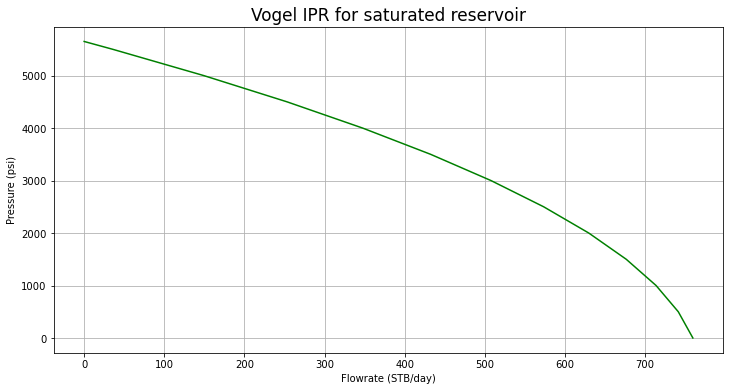

In [8]:
vogel_saturated()

### Dynamic Plotting : IPR Vogel Saturated

In [3]:
#unfinished
def vogeldynamic(K,viscosity):
    h = 60
    P = 5651
    Pb = 5651
    Bo = 1.1
    ct = 0.0000129
    A = 640
    re = np.sqrt(43560*A/3.14)
    rw = 0.32
    S = 0
    
    #calculate PI
    PI = K*h/(141.2*Bo*viscosity*(np.log(re/rw)-0.75+S))
    print(f'\nThe value of productivity index is {PI} STB/psi/day')
    
    #calculate qmax (Absolute Open Flow)
    qmax = PI*P/1.8
    print(f'The value of qmax is {qmax} STB/day')
    
    #generating pwf_assumption
    a = np.arange(0,P,500) #only untill 5500 psi

    #including the reservoir pressure, 5651 psi
    pwf_assumption = np.append(a,P)

    #reverse to make easier
    pwf_assumption = pwf_assumption[-1::-1]
    
    #calculate each flowrate at pwf_assumption
    flowrate = []
    for i in pwf_assumption:
        q = qmax*(1-0.2*(i/P)-0.8*((i/P)**2))
        flowrate.append(q)
     
    #Plotting
    plt.figure(figsize=(12,6))
    plt.plot(flowrate,pwf_assumption, color='green')
    plt.xlabel('Flowrate (STB/day)')
    plt.ylabel('Pressure (psi)')
    plt.title('Vogel IPR for saturated reservoir', size=17)
    plt.grid()
    
    return flowrate, pwf_assumption

In [6]:
#check the effect of porosity,K,viscosity
v = interactive(vogeldynamic, K = (0,1000), viscosity = (0,100,0.01)) #provide starting and stopping point
v

interactive(children=(IntSlider(value=500, description='K', max=1000), FloatSlider(value=50.0, description='vi…

In [20]:
#Vogel IPR function in which reservoir pressure is greater than bubble point pressure
#both straight line (pwf > p_bubble) and curve line (pwf < p_bubble)

#assumption:
#pwf_test > Pb

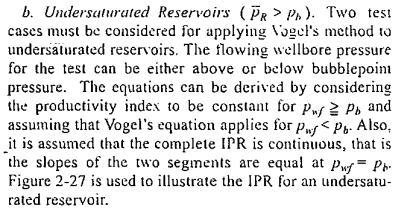

### linear part (Pwf > Pb):

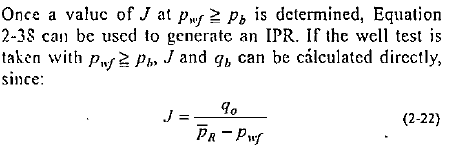

### non-linear part (Pwf < Pb):

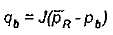

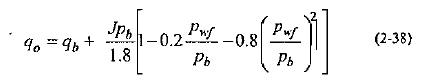

In [41]:
#Example from the book of "Production Optimization Using Nodal Analysis" by Dale Beggs, Page 25

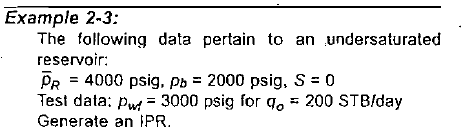

In [3]:
#create user input
Pr = float(input('Reservoir pressure (psi): '))
Pb = float(input('bubble point pressure (psi): '))
S = float(input('Skin factor: '))
Pwf_test = float(input('Pwf test (psi): '))
q = float(input('flowrate (STB/day): '))

Reservoir pressure (psi): 4000
bubble point pressure (psi): 2000
Skin factor: 0
Pwf test (psi): 3000
flowrate (STB/day): 200


In [4]:
#calculate PI
PI = q/(Pr-Pwf_test)
print(f'The productivity index of the well is {PI} STB/day/psi')

The productivity index of the well is 0.2 STB/day/psi


In [45]:
#calculate flowrate at bubble point pressure using the previous PI
qb = PI*(Pr-Pb)
print(f'flowrate at bubble point pressure is {qb} STB/day')

#calculate qmax
qmax = qb + (PI*Pb/1.8)
print(f'flowrate maximum (qmax) is {qmax} STB/day')

flowrate at bubble point pressure is 400.0 STB/day
flowrate maximum (qmax) is 622.2222222222222 STB/day


In [57]:
#generating pwf_assumption

#generating pwf_assumption for pwf_assumption > Pb
a = np.arange(2000,Pr,400)
a = np.append(a,Pr)
a = a[-1::-1]


#generating pwf_assumption for pwf_assumption < Pb
b = np.arange(0,2000,400)
b = b[-1::-1]

#combine pwf_assumption for plotting purpose
pwf_assumption = np.concatenate((a,b))

In [59]:
#calculate flowrate for each pwf_assumption

#if pwf_assumption > Pb, use equation (2-22) (linear part)
#if pwf_assumption < Pb, use equation (2-38) (non-linear part)

#flowrate at Pwf > Pb
flowrate_greater_Pb = []
for i in a:
    q_greater_Pb = PI*(Pr - i)
    flowrate_greater_Pb.append(q_greater_Pb)
flowrate_greater_Pb

#flowrate at Pwf < Pb
flowrate_lesser_Pb = []
for i in b:
    q_lesser_Pb = qb + (((PI*Pb)/1.8)*(1-0.2*(i/Pb)-0.8*((i/Pb)**2)))
    flowrate_lesser_Pb.append(q_lesser_Pb)

#combine both flowrate
flowrate = flowrate_greater_Pb + flowrate_lesser_Pb # "+" means combine both of them, it's not adding each of them one by one

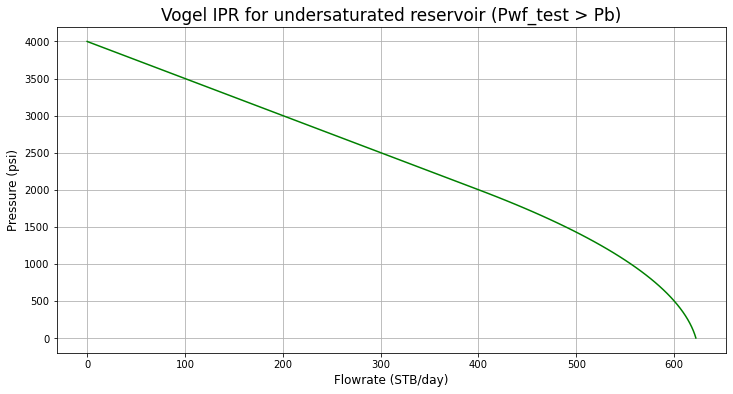

In [29]:
#Plotting
plt.figure(figsize=(12,6))
plt.plot(flowrate, pwf_assumption, color='green')
plt.xlabel('Flowrate (STB/day)', fontsize=12)
plt.ylabel('Pressure (psi)', fontsize=12)
plt.title('Vogel IPR for undersaturated reservoir (Pwf_test > Pb)', size=17)
plt.grid()

In [61]:
#create a function
def vogel_undersaturated_pwf_greater_Pb():
    #create user input
    Pr = float(input('Reservoir pressure (psi): '))
    Pb = float(input('bubble point pressure (psi): '))
    S = float(input('Skin factor: '))
    Pwf_test = float(input('Pwf test (psi): '))
    q = float(input('flowrate (STB/day): '))
    
    #calculate PI
    PI = q/(Pr-Pwf_test)
    print(f'The productivity index of the well is {PI} STB/day/psi')
    
    #calculate flowrate at bubble point pressure using the previous PI
    qb = PI*(Pr-Pb)
    print(f'flowrate at bubble point pressure (qb) is {qb} STB/day')
    
    #calculate qmax
    qmax = qb + (PI*Pb/1.8)
    print(f'flowrate maximum (qmax) is {qmax} STB/day')
    
    #generating pwf_assumption
    #generating pwf_assumption for pwf_assumption > Pb
    a = np.arange(2000,Pr,50)
    a = np.append(a,Pr)
    a = a[-1::-1]

    #generating pwf_assumption for pwf_assumption < Pb
    b = np.arange(0,2000,50)
    b = b[-1::-1]

    #combine pwf_assumption for plotting purpose
    pwf_assumption = np.concatenate((a,b))
    
    #calculate flowrate for each pwf_assumption
    #if pwf_assumption > Pb, use equation (2-22) (linear part)
    #if pwf_assumption < Pb, use equation (2-38) (non-linear part)

    #flowrate at Pwf > Pb
    flowrate_greater_Pb = []
    for i in a:
        q_greater_Pb = PI*(Pr - i)
        flowrate_greater_Pb.append(q_greater_Pb)
    flowrate_greater_Pb

    #flowrate at Pwf < Pb
    flowrate_lesser_Pb = []
    for i in b:
        q_lesser_Pb = qb + (((PI*Pb)/1.8)*(1-0.2*(i/Pb)-0.8*((i/Pb)**2)))
        flowrate_lesser_Pb.append(q_lesser_Pb)

    #combine both flowrate
    flowrate = flowrate_greater_Pb + flowrate_lesser_Pb # "+" means combine both of them, it's not adding each of them one by one
    
    #Plotting
    plt.figure(figsize=(12,6))
    plt.plot(flowrate,pwf_assumption, color='green')
    plt.xlabel('Flowrate (STB/day)', fontsize=12)
    plt.ylabel('Pressure (psi)', fontsize=12)
    plt.title('Vogel IPR for undersaturated reservoir (Pwf_test > Pb)', size=17)
    plt.grid()

Reservoir pressure (psi): 2350
bubble point pressure (psi): 1700
Skin factor: 0
Pwf test (psi): 1900
flowrate (STB/day): 600
The productivity index of the well is 1.3333333333333333 STB/day/psi
flowrate at bubble point pressure (qb) is 866.6666666666666 STB/day
flowrate maximum (qmax) is 2125.9259259259256 STB/day


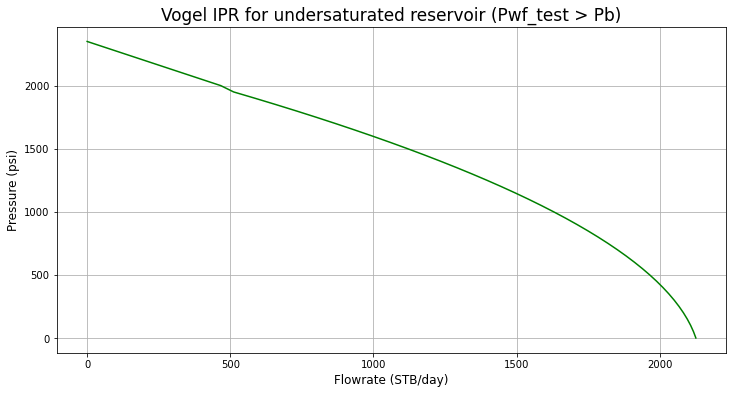

In [62]:
vogel_undersaturated_pwf_greater_Pb()

## Comparison Between Vogel and Fetkovich IPR

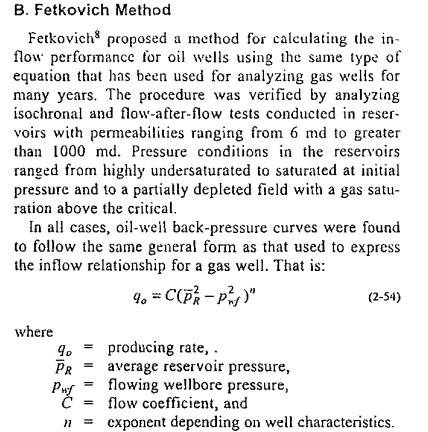

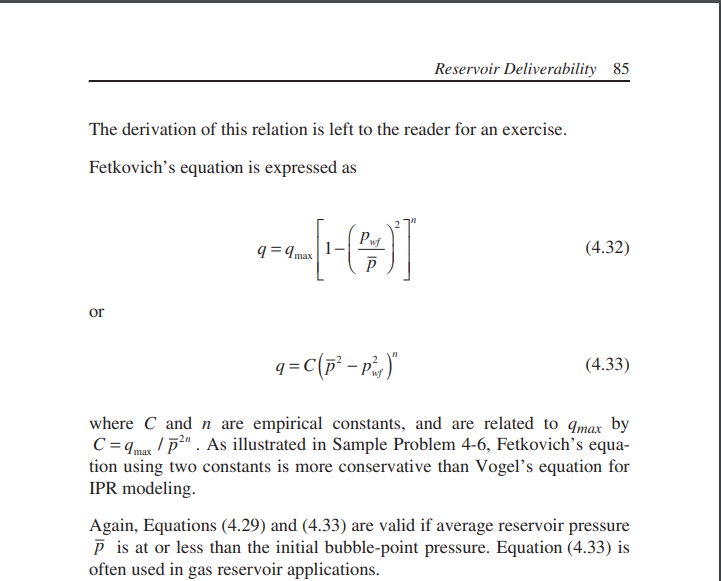

In [5]:
#Well Productivity Handbook (Boyun Guo, Kai Sun, and Ali Ghalambor 2008)

In [3]:
Pr = float(input("Enter the Reservoir Pressure(psia): "))
Pwf1 = float(input("Enter the first testing pressure(psia): "))
q1 = float(input("Enter the tested flowrate at first testing pressure(stb/day): "))
Pwf2 = float(input("Enter the second testing pressure(psia): "))
q2 = float(input("Enter the tested flowrate at second testing pressure(stb/day): "))

Enter the Reservoir Pressure(psia): 3000
Enter the first testing pressure(psia): 2000
Enter the tested flowrate at first testing pressure(stb/day): 500
Enter the second testing pressure(psia): 1000
Enter the tested flowrate at second testing pressure(stb/day): 800


In [4]:
# vogel calculation
qmax = float(q1/(1-0.2*(Pwf1/Pr)-0.8*((Pwf1/Pr)**2)))
qmax

978.2608695652175

In [5]:
Pressures = np.arange(0,Pr+250,250)

flowrate_vogel = []
for i in Pressures:
    q = qmax*(1-0.2*(i/Pr)-0.8*((i/Pr)**2))
    flowrate_vogel.append(q)
flowrate_vogel = np.array(flowrate_vogel)

In [6]:
# Fetkovich Calculation
# 0:55
n = np.log10(q1/q2)/(np.log10((Pr**2-Pwf1**2)/(Pr**2-Pwf2**2)))
c = q1/((Pr**2-Pwf1**2)**n)

In [7]:
flowrate_fetkovich = []

for j in Pressures:
    Q = float(c*((Pr**2-j**2)**n))
    flowrate_fetkovich.append(Q)
flowrate_fetkovich = np.array(flowrate_fetkovich)

In [8]:
df = pd.DataFrame()
df['Presurres'] = Pressures
df['flowrate_vogel'] = flowrate_vogel
df['flowrate_fetkovich'] = flowrate_fetkovich

df

,Presurres,flowrate_vogel,flowrate_fetkovich
0,0.0,978.260870,900.00
1,250.0,956.521739,893.75
2,500.0,923.913043,875.00
3,750.0,880.434783,843.75
4,1000.0,826.086957,800.00
5,1250.0,760.869565,743.75
6,1500.0,684.782609,675.00
7,1750.0,597.826087,593.75
8,2000.0,500.000000,500.00
9,2250.0,391.304348,393.75


    Presurres  flowrate_vogel  flowrate_fetkovich
0         0.0      978.260870              900.00
1       250.0      956.521739              893.75
2       500.0      923.913043              875.00
3       750.0      880.434783              843.75
4      1000.0      826.086957              800.00
5      1250.0      760.869565              743.75
6      1500.0      684.782609              675.00
7      1750.0      597.826087              593.75
8      2000.0      500.000000              500.00
9      2250.0      391.304348              393.75
10     2500.0      271.739130              275.00
11     2750.0      141.304348              143.75
12     3000.0        0.000000                0.00


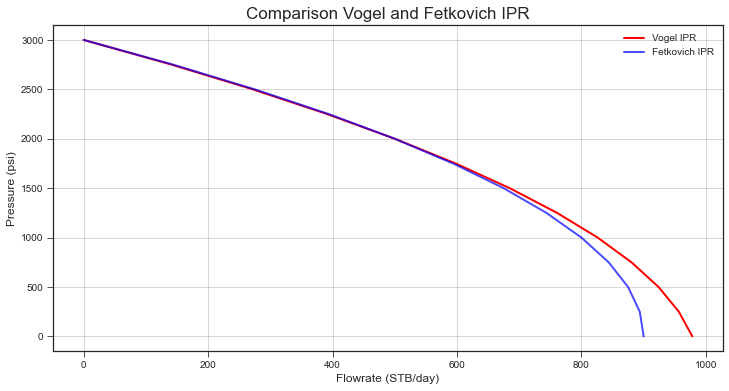

In [9]:
print(df)
plt.figure(figsize = (12,6))
plt.style.use('seaborn-ticks')
plt.plot(flowrate_vogel, Pressures, label='Vogel IPR', color='red', linewidth = 2)
plt.plot(flowrate_fetkovich, Pressures, label='Fetkovich IPR', color='blue', linewidth = 2, alpha = 0.7)
plt.xlabel('Flowrate (STB/day)', fontsize=12)
plt.ylabel('Pressure (psi)', fontsize=12)
plt.title('Comparison Vogel and Fetkovich IPR', size=17)
plt.legend()
plt.grid(c = 'black', alpha = 0.2)

In [18]:
def comparison_fetkovich_vogel():
    #user input
    Pr = float(input("Enter the Reservoir Pressure(psia): "))
    Pwf1 = float(input("Enter the first testing pressure(psia): "))
    q1 = float(input("Enter the tested flowrate at first testing pressure(stb/day): "))
    Pwf2 = float(input("Enter the second testing pressure(psia): "))
    q2 = float(input("Enter the tested flowrate at second testing pressure(stb/day): "))
    
    Pressures = np.arange(0,Pr+250,250)
    
    # vogel calculation
    qmax = float(q1/(1-0.2*(Pwf1/Pr)-0.8*((Pwf1/Pr)**2)))
    flowrate_vogel = []
    for i in Pressures:
        q = qmax*(1-0.2*(i/Pr)-0.8*((i/Pr)**2))
        flowrate_vogel.append(q)
    flowrate_vogel = np.array(flowrate_vogel)
    
    # Fetkovich Calculation
    n = np.log10(q1/q2)/(np.log10((Pr**2-Pwf1**2)/(Pr**2-Pwf2**2)))
    c = q1/((Pr**2-Pwf1**2)**n)
    flowrate_fetkovich = []
    for j in Pressures:
        Q = float(c*((Pr**2-j**2)**n))
        flowrate_fetkovich.append(Q)
    flowrate_fetkovich = np.array(flowrate_fetkovich)
    
    # Data Frame
    df = pd.DataFrame()
    df['Presurres'] = Pressures
    df['flowrate_vogel'] = flowrate_vogel
    df['flowrate_fetkovich'] = flowrate_fetkovich
    print(df)
    
    # Plotting
    plt.figure(figsize = (12,6))
    plt.style.use('seaborn-ticks')
    plt.plot(flowrate_vogel, Pressures, label='Vogel IPR', color='red', linewidth = 2)
    plt.plot(flowrate_fetkovich, Pressures, label='Fetkovich IPR', color='blue', linewidth = 2, alpha = 0.7)
    plt.xlabel('Flowrate (STB/day)', fontsize=12)
    plt.ylabel('Pressure (psi)', fontsize=12)
    plt.title('Comparison Vogel and Fetkovich IPR', size=17)
    plt.legend()
    plt.grid(c = 'black', alpha = 0.2)

Enter the Reservoir Pressure(psia): 3000
Enter the first testing pressure(psia): 2000
Enter the tested flowrate at first testing pressure(stb/day): 500
Enter the second testing pressure(psia): 1000
Enter the tested flowrate at second testing pressure(stb/day): 800
    Presurres  flowrate_vogel  flowrate_fetkovich
0         0.0      978.260870              900.00
1       250.0      956.521739              893.75
2       500.0      923.913043              875.00
3       750.0      880.434783              843.75
4      1000.0      826.086957              800.00
5      1250.0      760.869565              743.75
6      1500.0      684.782609              675.00
7      1750.0      597.826087              593.75
8      2000.0      500.000000              500.00
9      2250.0      391.304348              393.75
10     2500.0      271.739130              275.00
11     2750.0      141.304348              143.75
12     3000.0        0.000000                0.00


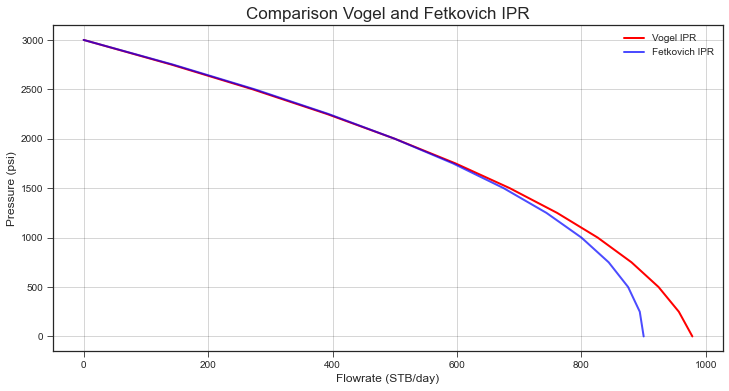

In [13]:
comparison_fetkovich_vogel()

## Material Balance
#### 1. Gas Material Balance

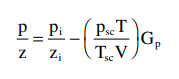

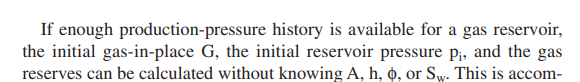

In [58]:
Time = [0,0.5,1,1.5,2] #years
ReservoirPressure = [1798,1680,1540,1428,1335] #psia
Z = [0.869,0.870,0.880,0.890,0.900] #laboratorium
Gp = [0,0.96,2.12,3.21,3.92] #MMMSCF

In [59]:
df = pd.DataFrame({"Time(years)":Time, "ReservoirPressure(psia)":ReservoirPressure, "Z factor":Z, "Cumulative Gas produced(MMMSCF)":Gp})
df

,Time(years),ReservoirPressure(psia),Z factor,Cumulative Gas produced(MMMSCF)
0,0.0,1798,0.869,0.00
1,0.5,1680,0.870,0.96
2,1.0,1540,0.880,2.12
3,1.5,1428,0.890,3.21
4,2.0,1335,0.900,3.92


In [60]:
#make new column
df['P/Z'] = df['ReservoirPressure(psia)']/df['Z factor']
df

,Time(years),ReservoirPressure(psia),Z factor,Cumulative Gas produced(MMMSCF),P/Z
0,0.0,1798,0.869,0.00,2069.044879
1,0.5,1680,0.870,0.96,1931.034483
2,1.0,1540,0.880,2.12,1750.000000
3,1.5,1428,0.890,3.21,1604.494382
4,2.0,1335,0.900,3.92,1483.333333


In [61]:
#x-axis and y-axis
x = df['Cumulative Gas produced(MMMSCF)']
y = df['P/Z']

(0.0, 2500.0)

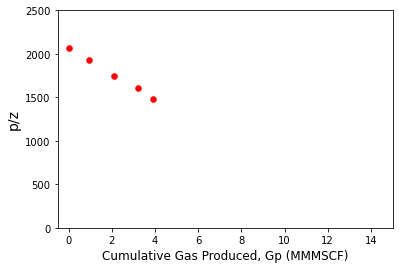

In [62]:
plt.scatter(x,y, c='red', linewidths = 0.5)
plt.xlabel("Cumulative Gas Produced, Gp (MMMSCF)", fontsize = 12)
plt.ylabel("p/z", fontsize = 14)
plt.xlim(-0.5,15)
plt.ylim(0,2500)

In [63]:
model = np.polyfit(x,y,1) #slope and intercept
model

array([-148.2874553 , 2070.38439919])

In [64]:
PZ_extrapolated = np.arange(model[1],0,-1)
PZ_extrapolated

array([2.07038440e+03, 2.06938440e+03, 2.06838440e+03, ...,
       2.38439919e+00, 1.38439919e+00, 3.84399187e-01])

In [65]:
Gp_extrapolated = (PZ_extrapolated-model[1])/model[0] #model[1]: intercept (2070.38), model[0]:slope (-148.29)

In [66]:
DF = pd.DataFrame({"Cumulative Gas Produced, Gp (MMMSCF)":Gp_extrapolated, "P/Z":PZ_extrapolated})
DF

,"Cumulative Gas Produced, Gp (MMMSCF)",P/Z
0,-0.000000,2070.384399
1,0.006744,2069.384399
2,0.013487,2068.384399
3,0.020231,2067.384399
4,0.026975,2066.384399
...,...,...
2066,13.932399,4.384399
2067,13.939143,3.384399
2068,13.945886,2.384399
2069,13.952630,1.384399


In [67]:
initial_gas_in_place = (-model[1]/model[0]) #intercept divided by slope
initial_gas_in_place

13.96196593265718

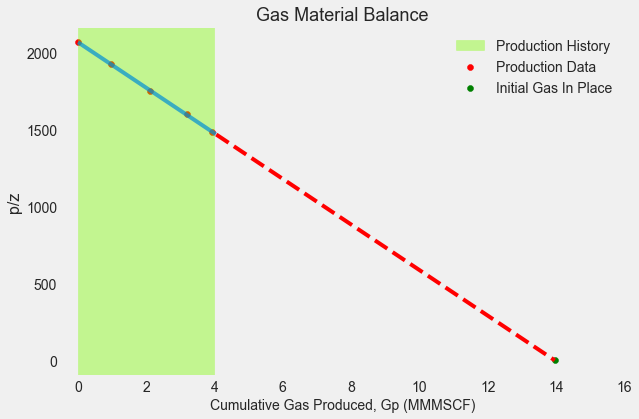

The Initial Gas In Place is 13.96196593265718 MMMSCF


In [115]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (9,6))
plt.plot(DF["Cumulative Gas Produced, Gp (MMMSCF)"][1:600], DF["P/Z"][1:600], alpha = 0.7)
plt.plot(DF["Cumulative Gas Produced, Gp (MMMSCF)"][601:2072], DF["P/Z"][601:2072], ls = "--", c = 'red')
plt.scatter(x,y, c='red', linewidths = 0.5, label='Production Data')
plt.scatter(initial_gas_in_place,y=0, c='green', linewidths = 0.5, label='Initial Gas In Place')
plt.xlim(-0.5,16)
plt.axvspan(xmin=0, xmax=4, alpha = 0.4, label="Production History", color = "chartreuse")
plt.xlabel("Cumulative Gas Produced, Gp (MMMSCF)", fontsize = 14)
plt.ylabel("p/z", fontsize = 16)
plt.title("Gas Material Balance", fontsize = 18)
plt.grid()
plt.legend(loc='best')
plt.show()
print(f"The Initial Gas In Place is {initial_gas_in_place} MMMSCF")

#### 2. Oil Material Balance for Undersaturated (Pi > Pb)

1. Oil expansion
2. water expansion
3. We = 0 (there is no water influx) ; m (ratio between gas volume and oil volume) = 0 (because of undersated reservoir)

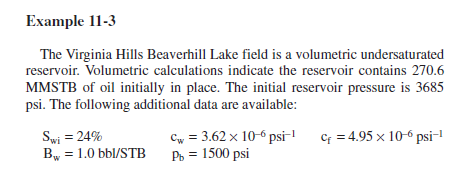

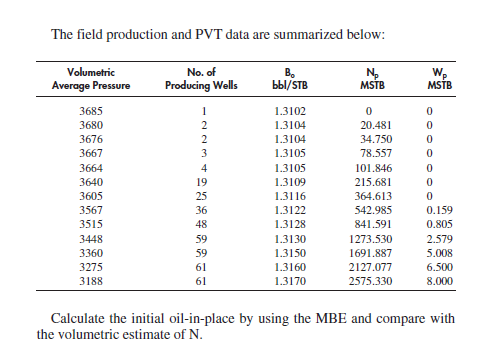

In [4]:
# example from Tarek Ahmed Res. Eng Handbook 2010

In [30]:
swi = float(input("Enter the initial water saturation: "))
cw = float(input("Enter the compressibility of water: "))
cf = float(input("Enter the compressibility of formation: "))
Pb = float(input("Enter the bubble point pressure: "))
Bw = float(input("Enter the volume factor of water: "))

Enter the initial water saturation: 0.24
Enter the compressibility of water: 0.00000362
Enter the compressibility of formation: 0.000004958
Enter the bubble point pressure: 1500
Enter the volume factor of water: 1


In [5]:
Reservoir_Pressure = [3685, 3680,3676,3667,3664,3640,3605,3567,3515,3448,3360,3275,3188]
No_of_producing_wells = [1,2,2,3,4,19,25,36,48,59,59,61,61]
Bo = [1.3102,1.3104,1.3104,1.3105,1.3105,1.3109,1.3116,1.3122,1.3128,1.3130,1.3150,1.3160,1.3170]
Np = [0,20.481,34.750,78.557,101.846,215.681,364.613, 542.985,841.591,1273.530 ,1691.887,2127.077,2575.330 ]
Wp = [0,0,0,0,0,0,0,0.159,0.805,2.579,5.008,6.5,8]

In [113]:
#create pandas
df = pd.DataFrame({"Reservoir_Pressure (psi)":Reservoir_Pressure, "No. of producing wells":No_of_producing_wells, "Bo (bbl/STB)":Bo, "Np (MSTB)":Np, "Wp (MSTB)":Wp})
df

,Reservoir_Pressure (psi),No. of producing wells,Bo (bbl/STB),Np (MSTB),Wp (MSTB)
0,3685,1,1.3102,0.000,0.000
1,3680,2,1.3104,20.481,0.000
2,3676,2,1.3104,34.750,0.000
3,3667,3,1.3105,78.557,0.000
4,3664,4,1.3105,101.846,0.000
5,3640,19,1.3109,215.681,0.000
6,3605,25,1.3116,364.613,0.000
7,3567,36,1.3122,542.985,0.159
8,3515,48,1.3128,841.591,0.805
9,3448,59,1.3130,1273.530,2.579


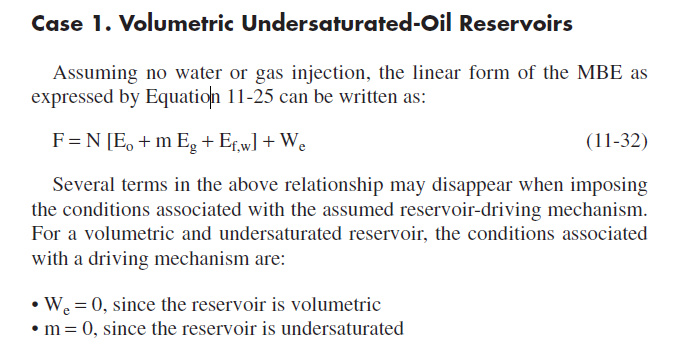

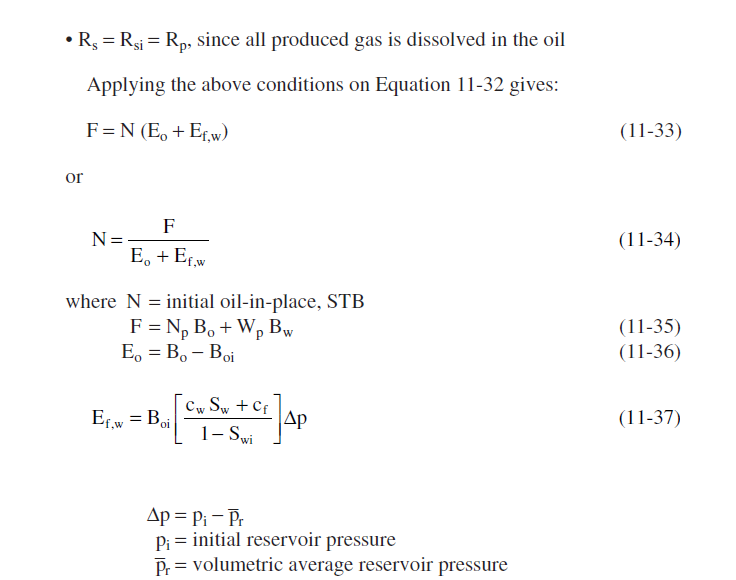

In [195]:
# F = N (Eo + Ef,w)

#calculate Ef,w: expansion of the initial water and the reduction in the pore volume
Boi = df['Bo (bbl/STB)'][0]
Pi = df['Reservoir_Pressure (psi)'][0]
df['delta Pressure (psi)'] = abs(df['Reservoir_Pressure (psi)'] - Pi)
df["Efw (bbl/STB)"] = Boi*((cw*swi + cf)/(1-swi))*df['delta Pressure (psi)']

In [196]:
#calculate Eo: the expansion of oil and its originally dissolved gas
df['Eo (bbl/STB)'] = df['Bo (bbl/STB)'] - Boi

In [197]:
# calculate F: underground withdrawal (cummulative fluid production)
# F = Np*Bo + Wp*Bw
df['F (Mbbl)'] = df['Np (MSTB)']*df['Bo (bbl/STB)'] + df['Wp (MSTB)']*Bw

In [198]:
df['Eo + Efw (bbl/STB)'] = df['Eo (bbl/STB)'] + df['Efw (bbl/STB)']
df

,Reservoir_Pressure (psi),No. of producing wells,Bo (bbl/STB),Np (MSTB),Wp (MSTB),delta Pressure (psi),Efw (bbl/STB),Eo (bbl/STB),F (Mbbl),Eo + Efw (bbl/STB)
0,3685,1,1.3102,0.000,0.000,0,0.000000,0.0000,0.000000,0.000000
1,3680,2,1.3104,20.481,0.000,5,0.000050,0.0002,26.838302,0.000250
2,3676,2,1.3104,34.750,0.000,9,0.000090,0.0002,45.536400,0.000290
3,3667,3,1.3105,78.557,0.000,18,0.000181,0.0003,102.948949,0.000481
4,3664,4,1.3105,101.846,0.000,21,0.000211,0.0003,133.469183,0.000511
5,3640,19,1.3109,215.681,0.000,45,0.000452,0.0007,282.736223,0.001152
6,3605,25,1.3116,364.613,0.000,80,0.000804,0.0014,478.226411,0.002204
7,3567,36,1.3122,542.985,0.159,118,0.001185,0.0020,712.663917,0.003185
8,3515,48,1.3128,841.591,0.805,170,0.001708,0.0026,1105.645665,0.004308
9,3448,59,1.3130,1273.530,2.579,237,0.002381,0.0028,1674.723890,0.005181


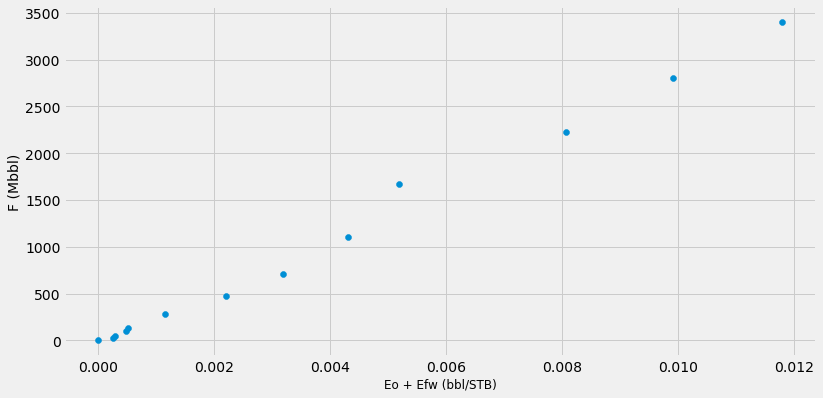

In [199]:
x = df["Eo + Efw (bbl/STB)"]
y = df['F (Mbbl)']

plt.figure(figsize = (12,6))
plt.scatter(x,y)
plt.xlabel('Eo + Efw (bbl/STB)', fontsize = 12)
plt.ylabel('F (Mbbl)', fontsize = 14)
plt.show()

In [200]:
#slope and intercept
model_mbe = np.polyfit(x,y,1) #slope and intercept
model_mbe #(slope, intercept)

slope = model_mbe[0] #MSTB
intercept = model_mbe[1]

model_mbe

array([ 2.89906877e+05, -5.57943428e+01])

In [205]:
initial_oil_in_place = slope
print(f'{round(initial_oil_in_place/1000)} MMSTB')

290 MMSTB


In [207]:
#create a straight line or F best fitted line
df['F (Mbbl)_Fit'] = slope*df['Eo + Efw (bbl/STB)'] - 55.7943428

In [208]:
df

,Reservoir_Pressure (psi),No. of producing wells,Bo (bbl/STB),Np (MSTB),Wp (MSTB),delta Pressure (psi),Efw (bbl/STB),Eo (bbl/STB),F (Mbbl),Eo + Efw (bbl/STB),F (Mbbl)_Fit
0,3685,1,1.3102,0.000,0.000,0,0.000000,0.0000,0.000000,0.000000,-55.794343
1,3680,2,1.3104,20.481,0.000,5,0.000050,0.0002,26.838302,0.000250,16.747745
2,3676,2,1.3104,34.750,0.000,9,0.000090,0.0002,45.536400,0.000290,28.396316
3,3667,3,1.3105,78.557,0.000,18,0.000181,0.0003,102.948949,0.000481,83.596287
4,3664,4,1.3105,101.846,0.000,21,0.000211,0.0003,133.469183,0.000511,92.332714
5,3640,19,1.3109,215.681,0.000,45,0.000452,0.0007,282.736223,0.001152,278.186887
6,3605,25,1.3116,364.613,0.000,80,0.000804,0.0014,478.226411,0.002204,583.046691
7,3567,36,1.3122,542.985,0.159,118,0.001185,0.0020,712.663917,0.003185,867.652235
8,3515,48,1.3128,841.591,0.805,170,0.001708,0.0026,1105.645665,0.004308,1193.027775
9,3448,59,1.3130,1273.530,2.579,237,0.002381,0.0028,1674.723890,0.005181,1446.122702


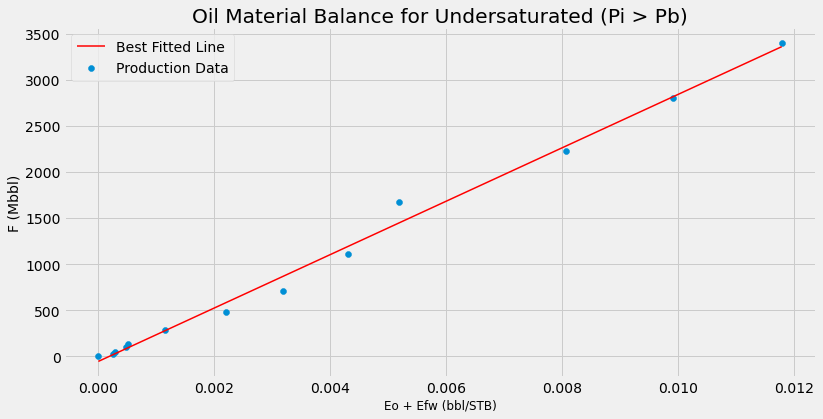

The initial oil in place is 290 MMSTB given by the slope of the straight line


In [211]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12,6))
plt.scatter(x,y, label='Production Data')
plt.plot(df['Eo + Efw (bbl/STB)'], df['F (Mbbl)_Fit'], c='red', linewidth = 1.5, label='Best Fitted Line')
plt.xlabel('Eo + Efw (bbl/STB)', fontsize = 12)
plt.ylabel('F (Mbbl)', fontsize = 14)
plt.title('Oil Material Balance for Undersaturated (Pi > Pb)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

print(f'The initial oil in place is {round(initial_oil_in_place/1000)} MMSTB given by the slope of the straight line')

#### 3. Gas-Cap MBAL

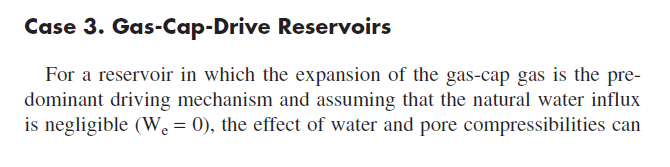

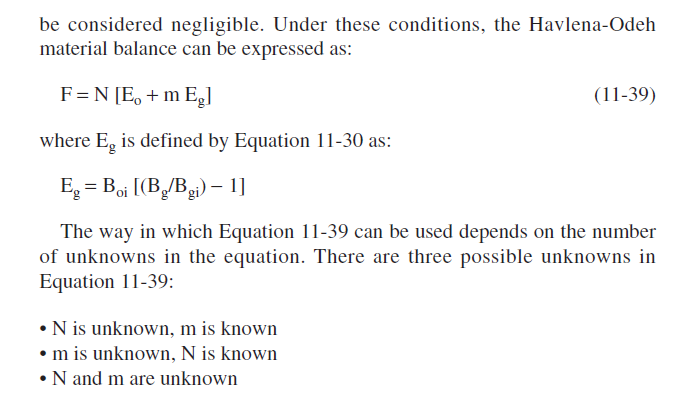

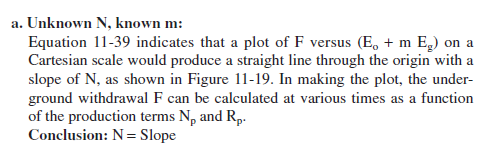

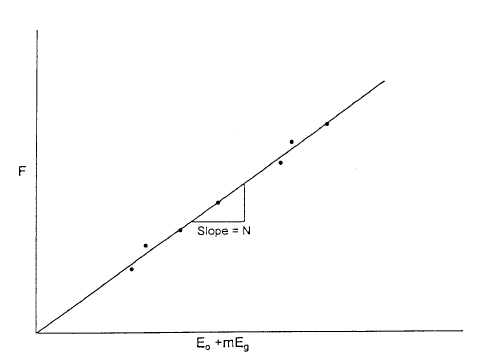

In [3]:
# Efw is negligible

In [7]:
ReservoirPressure = [3330,3150,3000,2850,2700,2550,2400]
Np = [0,3.295,5.903,8.852,11.503,14.513,17.730]
Rp = [0,1050,1060,1160,1235,1265,1300]
Bo = [1.2511,1.2353,1.2222,1.2122,1.2022,1.1922,1.1822]
Rs = [510,477,450,425,401,375,352]
Bg  = [0.00087,0.00092,0.00096,0.00101,0.00107,0.00113,0.00120]

In [8]:
df = pd.DataFrame({"Reservoir Pressure (psia)":ReservoirPressure, "Np (MMSTB)":Np, "Cumulative GOR, Rp (scf/stb)":Rp, "Rs scf/stb":Rs, "Bo (bbl/stb)":Bo, "Bg bbl/scf":Bg})

In [9]:
# Total Underground Withdrawl F Term (oil and gas production)
df['F (MMbbl)'] = df['Np (MMSTB)']*(df['Bo (bbl/stb)'] + (df['Cumulative GOR, Rp (scf/stb)'] - df['Rs scf/stb'])*df['Bg bbl/scf'])

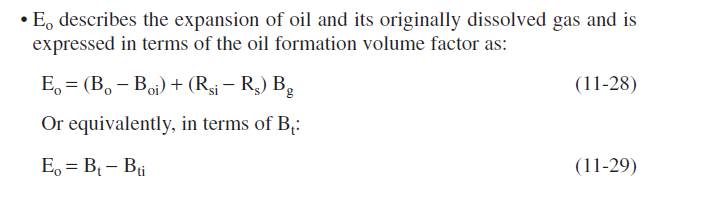

In [10]:
#calculate Eo: the expansion of oil and its originally dissolved gas
df['Eo (bbl/STB)'] = (df['Bo (bbl/stb)'] - df['Bo (bbl/stb)'][0]) + (df['Rs scf/stb'][0] - df['Rs scf/stb'])*df['Bg bbl/scf']

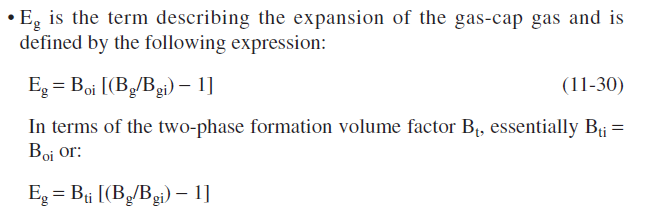

In [11]:
#calculate Eg: the expansion of the gas-cap gas
df['Eg (scf/STB)'] = df['Bo (bbl/stb)'][0] * ((df['Bg bbl/scf']/df['Bg bbl/scf'][0]) - 1)

In [12]:
dff = df

In [13]:
#take assumption of M:
M = [0.3,0.4,0.5,0.6,0.7]

In [14]:
for i in M:
    dff[f'Eo+M{i}Eg'] = dff['Eo (bbl/STB)'] + i*dff['Eg (scf/STB)']

dff

,Reservoir Pressure (psia),Np (MMSTB),"Cumulative GOR, Rp (scf/stb)",Rs scf/stb,Bo (bbl/stb),Bg bbl/scf,F (MMbbl),Eo (bbl/STB),Eg (scf/STB),Eo+M0.3Eg,Eo+M0.4Eg,Eo+M0.5Eg,Eo+M0.6Eg,Eo+M0.7Eg
0,3330,0.000,0,510,1.2511,0.00087,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,3150,3.295,1050,477,1.2353,0.00092,5.807306,0.01456,0.071902,0.036131,0.043321,0.050511,0.057701,0.064892
2,3000,5.903,1060,450,1.2222,0.00096,10.671443,0.02870,0.129424,0.067527,0.080470,0.093412,0.106354,0.119297
3,2850,8.852,1160,425,1.2122,0.00101,17.301677,0.04695,0.201326,0.107348,0.127481,0.147613,0.167746,0.187879
4,2700,11.503,1235,401,1.2022,0.00107,24.093954,0.06773,0.287609,0.154013,0.182774,0.211535,0.240296,0.269056
5,2550,14.513,1265,375,1.1922,0.00113,31.898123,0.09365,0.373892,0.205818,0.243207,0.280596,0.317985,0.355374
6,2400,17.730,1300,352,1.1822,0.00120,41.130054,0.12070,0.474555,0.263067,0.310522,0.357978,0.405433,0.452889


The initial oil in place is 155 MMSTB for m = 0.3
The initial oil in place is 132 MMSTB for m = 0.4
The initial oil in place is 114 MMSTB for m = 0.5
The initial oil in place is 101 MMSTB for m = 0.6
The initial oil in place is 90 MMSTB for m = 0.7


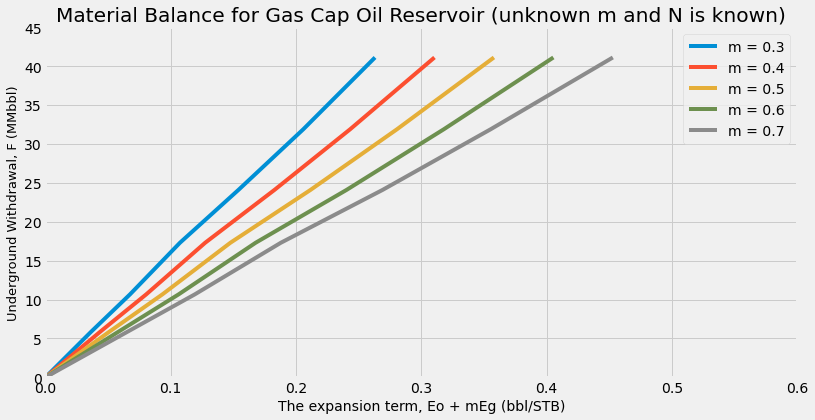

In [15]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,6))
plt.xlabel('The expansion term, Eo + mEg (bbl/STB)', fontsize = 14)
plt.ylabel('Underground Withdrawal, F (MMbbl)', fontsize = 13)
plt.title('Material Balance for Gas Cap Oil Reservoir (unknown m and N is known)')
plt.xlim(0,0.6)
plt.ylim(0,45)

for i in M:
    plt.plot(dff[f'Eo+M{i}Eg'], dff['F (MMbbl)'], label = f'm = {i}')
    plt.legend(loc='best')
    xx = dff[f'Eo+M{i}Eg']
    yy = dff['F (MMbbl)']
    Model = np.polyfit(xx,yy,1)
    print(f'The initial oil in place is {round(Model[0])} MMSTB for m = {i}')

In [16]:
#interactive plot
def GasCap(m): #m is Ratio of initial gas-cap gas reservoir volume to initial reservoir oil volume
    df['Eo+mEg (bbl/STB)'] = df['Eo (bbl/STB)'] + m*df['Eg (scf/STB)']
    x = df['Eo+mEg (bbl/STB)']
    y = df['F (MMbbl)']
    model = np.polyfit(x,y,1)
    print(f'The initial oil in place is {round(model[0])} MMSTB given by the slope of the straight line')
    
    adf = df[['Reservoir Pressure (psia)', 'F (MMbbl)', 'Eo+mEg (bbl/STB)']]
    print(adf)
    
    plt.figure(figsize=(10,6))
    plt.style.use('fivethirtyeight')
    plt.plot(x,y, c ='red')
    
    plt.xlabel('The expansion term, Eo + mEg (bbl/STB)', fontsize = 14)
    plt.ylabel('Underground Withdrawal, F (MMbbl)', fontsize = 13)
    plt.title('Material Balance for Gas Cap Oil Reservoir (unknown m and N is known)')
    
    return x,y

In [17]:
#check the effect m (known) when N is unknown
v = interactive(GasCap, m = (0.0000001,1,0.05)) #provide starting and stopping point
v

interactive(children=(FloatSlider(value=0.4500001, description='m', max=1.0, min=1e-07, step=0.05), Output()),…

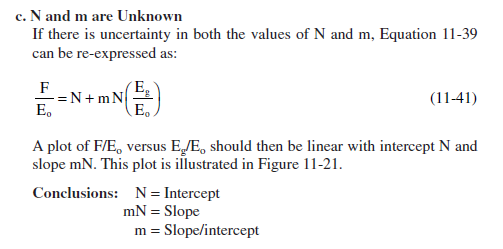

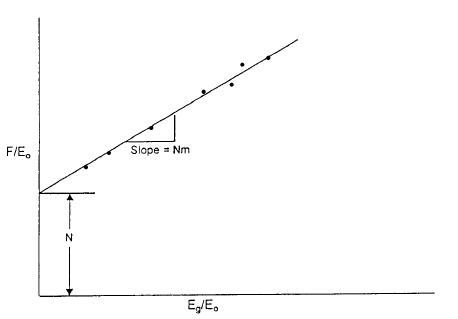

In [37]:
# use the same as data the example above
dff

,Reservoir Pressure (psia),Np (MMSTB),"Cumulative GOR, Rp (scf/stb)",Rs scf/stb,Bo (bbl/stb),Bg bbl/scf,F (MMbbl),Eo (bbl/STB),Eg (scf/STB),Eo+M0.3Eg,Eo+M0.4Eg,Eo+M0.5Eg,Eo+M0.6Eg,Eo+M0.7Eg,Eo+mEg (bbl/STB),F/Eo (STB),Eg/Eo (bbl/scf)
0,3330,0.000,0,510,1.2511,0.00087,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
1,3150,3.295,1050,477,1.2353,0.00092,5.807306,0.01456,0.071902,0.036131,0.043321,0.050511,0.057701,0.064892,0.043321,398.853413,4.938345
2,3000,5.903,1060,450,1.2222,0.00096,10.671443,0.02870,0.129424,0.067527,0.080470,0.093412,0.106354,0.119297,0.080470,371.827296,4.509552
3,2850,8.852,1160,425,1.2122,0.00101,17.301677,0.04695,0.201326,0.107348,0.127481,0.147613,0.167746,0.187879,0.127481,368.512814,4.288103
4,2700,11.503,1235,401,1.2022,0.00107,24.093954,0.06773,0.287609,0.154013,0.182774,0.211535,0.240296,0.269056,0.182774,355.735328,4.246408
5,2550,14.513,1265,375,1.1922,0.00113,31.898123,0.09365,0.373892,0.205818,0.243207,0.280596,0.317985,0.355374,0.243207,340.609959,3.992439
6,2400,17.730,1300,352,1.1822,0.00120,41.130054,0.12070,0.474555,0.263067,0.310522,0.357978,0.405433,0.452889,0.310522,340.762668,3.931692


In [106]:
dff['F/Eo (STB)'] = dff['F (MMbbl)']/dff['Eo (bbl/STB)']
dff['Eg/Eo (bbl/scf)'] = dff['Eg (scf/STB)']/dff['Eo (bbl/STB)']

bdf = dff[['Reservoir Pressure (psia)', 'F/Eo (STB)', 'Eg/Eo (bbl/scf)']]

In [43]:
#because there are NaN values, so we do polyfit only for the rows that dont have any NaN values
x = bdf['Eg/Eo (bbl/scf)'][1:7]
y = bdf['F/Eo (STB)'][1:7]

Model_bdf = np.polyfit(x,y,1)
Model_bdf

array([ 58.83013376, 108.70272737])

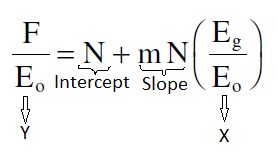

In [107]:
bdf

,Reservoir Pressure (psia),F/Eo (STB),Eg/Eo (bbl/scf)
0,3330,NaN,NaN
1,3150,398.853413,4.938345
2,3000,371.827296,4.509552
3,2850,368.512814,4.288103
4,2700,355.735328,4.246408
5,2550,340.609959,3.992439


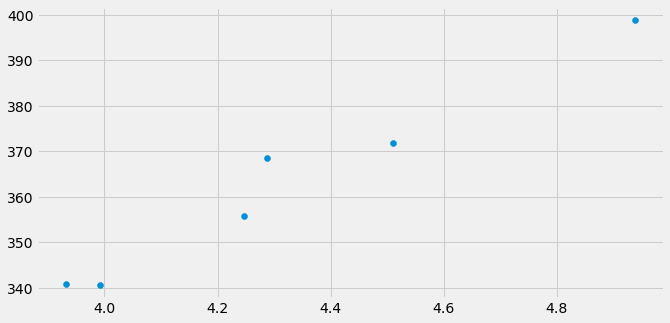

In [99]:
plt.figure(figsize=(10,5))
plt.scatter(x,y)

# 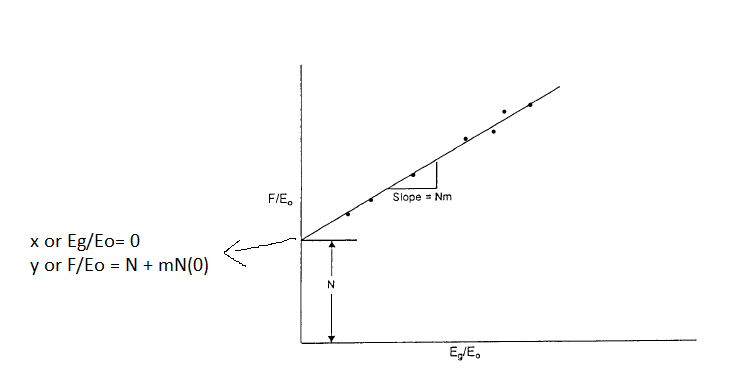

In [108]:
# create a straight line

# append zero in X
x_fitted = list(x)
x_fitted.append(0)

# calculate y_fitted value according the x_fitted
y_fitted = []
for i in x_fitted:
    a = Model_bdf[1] + Model_bdf[0]*i
    y_fitted.append(a)
    
# create DataFrame
bdf_fitted = pd.DataFrame({'x_fitted':x_fitted, 'y_fitted':y_fitted})
bdf_fitted

,x_fitted,y_fitted
0,4.938345,399.226207
1,4.509552,374.000266
2,4.288103,360.972402
3,4.246408,358.519462
4,3.992439,343.578474
5,3.931692,340.004668
6,0.000000,108.702727


In [109]:
bdf

,Reservoir Pressure (psia),F/Eo (STB),Eg/Eo (bbl/scf)
0,3330,NaN,NaN
1,3150,398.853413,4.938345
2,3000,371.827296,4.509552
3,2850,368.512814,4.288103
4,2700,355.735328,4.246408
5,2550,340.609959,3.992439


Initial Oil in Place (IOIP) is 109 MMSTB given by the intercept of the line
Ratio of initial gas-cap gas reservoir volume to initial reservoir oil volume (m) is 0.54


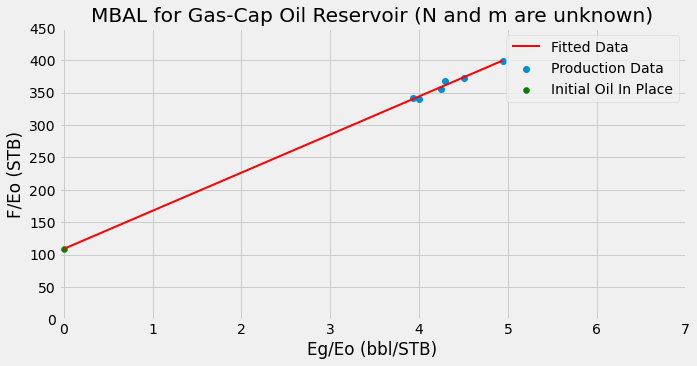

In [137]:
plt.figure(figsize=(10,5))
plt.xlabel('Eg/Eo (bbl/STB)')
plt.ylabel('F/Eo (STB)')
plt.title('MBAL for Gas-Cap Oil Reservoir (N and m are unknown)')
plt.scatter(x,y, lw=1, label='Production Data')
plt.scatter(0,Model_bdf[1], c='green', label='Initial Oil In Place')
plt.plot(x_fitted, y_fitted, c='red', lw= 2, label='Fitted Data')
plt.legend(loc='best')
plt.ylim(0,450)
plt.xlim(-0.05,7)

print(f'Initial Oil in Place (IOIP) is {round(Model_bdf[1])} MMSTB given by the intercept of the line')
print(f'Ratio of initial gas-cap gas reservoir volume to initial reservoir oil volume (m) is {round(Model_bdf[0]/Model_bdf[1],2)}')

## Effect of Skin
1. formation damage
2. pressure drop
3. higher Pwf

In [138]:
k =  float(input("Enter the value of permeability(mD) :"))
q =  float(input("Enter the value of oil flowrate(STB/Day) :"))
Bo = float(input("Enter the value of oil formation volume factor (bbl/STB) :"))
mu = float(input("Enter the value of oil viscosity(cP) :"))
h = float(input("Enter the value of payzone thickness(h) :")) 
pe = float(input("Enter the value of Pe(psi) :"))
re = float(input("Enter the outer radius of reservoir (ft): "))
rw = float(input("Enter the wellbore radius(ft) :"))

Enter the value of permeability(mD) :120
Enter the value of oil flowrate(STB/Day) :600
Enter the value of oil formation volume factor (bbl/STB) :1.25
Enter the value of oil viscosity(cP) :2.5
Enter the value of payzone thickness(h) :25
Enter the value of Pe(psi) :2500
Enter the outer radius of reservoir (ft)745
Enter the wellbore radius(ft) :0.25


In [140]:
# generating x-axis
r = np.linspace(rw,re,8000)
r

array([2.50000000e-01, 3.43105388e-01, 4.36210776e-01, ...,
       7.44813789e+02, 7.44906895e+02, 7.45000000e+02])

In [147]:
# create DataFrame
df = pd.DataFrame({'r':r})
df['Pressure'] = pe - (141.2*q*mu*Bo*(np.log(re/df['r']))/(k*h))
df

,r,Pressure
0,0.250000,1794.028365
1,0.343105,1821.966262
2,0.436211,1843.154020
3,0.529316,1860.226897
4,0.622422,1874.526193
...,...,...
7995,744.627578,2499.955873
7996,744.720684,2499.966907
7997,744.813789,2499.977939
7998,744.906895,2499.988970


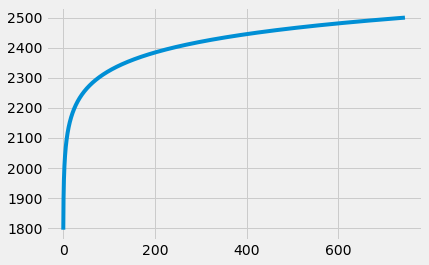

In [148]:
plt.plot(df['r'],df['Pressure'])